In [5]:
import numpy as np
import matplotlib.pyplot as plt
'''
色泽可以根据颜色深度 将浅白作为0、青绿作为1、乌黑作为2
根蒂可以根据蜷缩程度 将硬挺作为0、稍蜷作为1、蜷缩作为2
敲声可以根据声音音调 将沉闷作为0、浊响作为1、清脆作为2
纹理可以根据清晰程度 将清晰作为0、稍糊作为1、模糊作为2
脐部可以根据凹陷程度 将平坦作为0、稍凹作为1、凹陷作为2
触感可以根据硬滑程度 将软粘作为0、硬滑作为1
'''
# dataset
# row : feature     rol : sample
features=np.array([
    [1,2,2,1,0,1,2,2,2,1,0,0,1,0,2,0,1],
    [2,2,2,2,2,1,1,1,1,0,0,2,1,1,1,2,2],
    [1,0,1,0,1,1,1,1,0,2,2,1,1,0,1,1,0],
    [0,0,0,0,0,0,1,0,1,0,2,2,1,1,0,2,1],
    [2,2,2,2,2,1,1,1,1,0,0,0,2,2,1,0,1],
    [1,1,1,1,1,0,0,1,1,0,1,0,1,1,0,1,1],
    [0.697,0.774,0.634,0.608,0.556,0.403,0.481,0.437,0.666,0.243,0.245,0.343,0.639,0.657,0.360,0.593,0.719],
    [0.460,0.376,0.264,0.318,0.215,0.237,0.149,0.211,0.091,0.267,0.057,0.099,0.161,0.198,0.370,0.042,0.103]
])
# label
labels=np.array([
    [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]
])

def sigmoid(X):
    return 1./(1+np.exp(-X))
class Net():
    def __init__(self,num_input=8,num_hidden=10,num_output=1):
        #隐含层和输出层的权重和偏置
        self.W1=np.random.randn(num_hidden,num_input)
        self.b1=np.zeros(num_hidden).reshape(-1,1)
        self.W2=np.random.randn(num_output,num_hidden)
        self.b2=np.zeros(num_output).reshape(-1,1)
        #隐含层和输出层的输出
        self.o1=np.zeros(num_hidden).reshape(-1,1)
        self.o2=np.zeros(num_output).reshape(-1,1)
        #梯度存储变量
        self.do2=np.zeros(self.o2.shape)
        self.dW2=np.zeros(self.W2.shape)
        self.db2=np.zeros(self.b2.shape)
        self.do1=np.zeros(self.o1.shape)
        self.dW1=np.zeros(self.W1.shape)
        self.db1=np.zeros(self.b1.shape)

    def forward(self,X):#前向传播
        self.input=X
        #使用sigmoid函数为激活函数
        self.o1=sigmoid(np.matmul(self.W1,self.input)+self.b1)
        self.o2=sigmoid(np.matmul(self.W2,self.o1)+self.b2)
        return self.o2
        
    def standard_BP(self,label,lr=0.2):#标准BP 使用均方误差为损失函数
        #求梯度
        self.do2=self.o2-label
        self.dW2=np.matmul(self.do2*self.o2*(1-self.o2),self.o1.reshape(1,-1))
        self.db2=self.do2*self.o2*(1-self.o2)
        self.do1=np.matmul(self.W2.transpose(),self.do2*self.o2*(1-self.o2))
        self.dW1=np.matmul(self.do1*self.o1*(1-self.o1),self.input.reshape(1,-1))
        self.db1=self.do1*self.o1*(1-self.o1)
        #更新参数
        self.W2-=self.dW2*lr
        self.b2-=self.db2*lr
        self.W1-=self.dW1*lr
        self.b1-=self.db1*lr
    def accumulate_BP(self,labels,lr=0.2):#累积BP 使用均方误差为损失函数
        num=labels.shape[1]#样本数量
        #求梯度
        self.do2=(self.o2-labels)/num
        self.dW2=np.matmul(self.do2*self.o2*(1-self.o2),self.o1.transpose())
        self.db2=(self.do2*self.o2*(1-self.o2)).sum(axis=1).reshape(-1,1)
        self.do1=np.matmul(self.W2.transpose(),self.do2*self.o2*(1-self.o2))
        self.dW1=np.matmul(self.do1*self.o1*(1-self.o1),self.input.transpose())
        self.db1=(self.do1*self.o1*(1-self.o1)).sum(axis=1).reshape(-1,1)
        #更新参数
        self.W2-=self.dW2*lr
        self.b2-=self.db2*lr
        self.W1-=self.dW1*lr
        self.b1-=self.db1*lr
        
def train_standard_BP(features,labels,lr):
    net=Net()
    epoch=0
    loss=1
    all_loss=[]
    while loss>0.1:#停止条件
        for i in range(features.shape[1]):
            X=features[:,i]
            Y=labels[0,i]
            net.forward(X.reshape(-1,1))
            net.standard_BP(Y,lr)
        output=net.forward(features)
        loss=0.5*((output-labels)**2).sum()
        epoch+=1
        all_loss.append(loss)
    print("标准BP","学习率：",lr,"\n终止epoch：",epoch,"loss: ",loss)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.plot(all_loss)
    plt.show()
    
def train_accumulate_BP(features,labels,lr=0.2):
    net=Net()
    epoch=0
    loss=1
    all_loss=[]
    while loss>0.1:#停止条件
        output=net.forward(features)
        net.accumulate_BP(labels,lr)
        loss=0.5*((output-labels)**2).sum()/labels.shape[1]
        epoch+=1
        all_loss.append(loss)
    print()
    print("累积BP","学习率：",lr,"\n终止epoch：",epoch,"loss: ",loss)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.plot(all_loss)
    plt.show()


标准BP 学习率： 0.2 
终止epoch： 545 loss:  0.09974441157957478


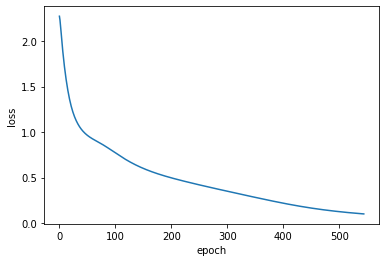


累积BP 学习率： 0.2 
终止epoch： 62 loss:  0.0998622517341079


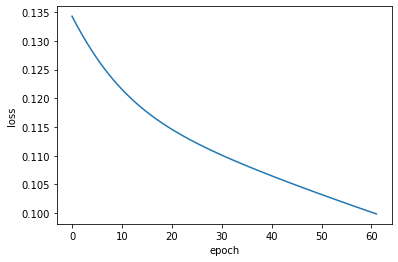

In [7]:
train_standard_BP(features,labels,lr=0.2)
train_accumulate_BP(features,labels,lr=0.2)